# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : December 1st 2016

- update : December 3rd 2016

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [33]:
import pandas as pd

In [34]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [35]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/HD14943"
#object_name='HD14943'

In [36]:
rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/August2016/Corr_HD205905"
object_name='HD205905'
infos='ctioAugust2016'

In [37]:
logfile='logbk_'+object_name+'_'+infos+'.fits'

In [38]:
filelist_all=os.listdir(rootpath_rawimage) 

In [39]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['corr_fileno016.fits',
 'corr_fileno035.fits',
 'corr_fileno051.fits',
 'corr_fileno077.fits',
 'corr_fileno1016.fits',
 'corr_fileno1017.fits',
 'corr_fileno1018.fits',
 'corr_fileno1052.fits',
 'corr_fileno1053.fits',
 'corr_fileno1054.fits',
 'corr_fileno1070.fits',
 'corr_fileno1071.fits',
 'corr_fileno1072.fits',
 'corr_fileno1088.fits',
 'corr_fileno1089.fits',
 'corr_fileno1090.fits',
 'corr_fileno1106.fits',
 'corr_fileno1107.fits',
 'corr_fileno1108.fits',
 'corr_fileno1142.fits',
 'corr_fileno1143.fits',
 'corr_fileno1144.fits',
 'corr_fileno1250.fits',
 'corr_fileno1251.fits',
 'corr_fileno1252.fits',
 'corr_fileno1268.fits',
 'corr_fileno1269.fits',
 'corr_fileno1270.fits',
 'corr_fileno1286.fits',
 'corr_fileno1287.fits',
 'corr_fileno1288.fits',
 'corr_fileno1304.fits',
 'corr_fileno1305.fits',
 'corr_fileno1306.fits',
 'corr_fileno1322.fits',
 'corr_fileno1323.fits',
 'corr_fileno1324.fits',
 'corr_fileno1340.fits',
 'corr_fileno1341.fits',
 'corr_fileno1342.fits',
 'co

In [40]:
index=0
indexes_files= []
filelist_fitsimages= []
for file in filelist_all: # loop on directories, one per image       
    #if re.search('^calibrated.*fits.gz$',filename):  #example of filename filter
    if re.search('^corr_fileno.*fits$',file):  #example of filename filter
        index=index+1
        shortfilename=os.path.join(rootpath_rawimage,file)
        filelist_fitsimages.append(shortfilename)
        indexes_files.append(index)

### Build tables for output file

In [41]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(filelist_fitsimages):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [42]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(dirlist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [43]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [44]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [45]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [46]:
thetable= Table(tbhdu.data)

In [47]:
thetable.show_in_notebook()

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
1,1.05,2016-08-23T02:55:43.922,corr_fileno016.fits,20.0,17.825,17.5,778.0,14.0,12.8,1.137
2,1.01,2016-08-23T03:42:22.879,corr_fileno035.fits,20.0,7.914,18.0,778.0,18.0,22.1,1.137
3,1.001,2016-08-23T04:15:21.175,corr_fileno051.fits,20.0,2.951,17.8,778.0,18.0,24.8,1.137
4,1.066,2016-08-23T05:47:35.480,corr_fileno077.fits,20.0,20.362,17.8,778.0,17.0,16.4,1.137
5,1.837,2016-08-25T23:40:53.427,corr_fileno1016.fits,20.0,57.103,14.8,778.0,17.0,8.1,1.14
6,1.826,2016-08-25T23:41:56.940,corr_fileno1017.fits,20.0,56.881,14.8,778.0,17.0,7.4,0.852
7,1.816,2016-08-25T23:43:00.269,corr_fileno1018.fits,20.0,56.66,14.8,778.0,17.0,6.8,0.943
8,1.443,2016-08-26T00:32:26.431,corr_fileno1052.fits,20.0,46.195,11.7,779.0,20.0,3.8,1.459
9,1.437,2016-08-26T00:33:29.948,corr_fileno1053.fits,20.0,45.969,11.7,779.0,20.0,2.9,1.184
10,1.432,2016-08-26T00:34:33.463,corr_fileno1054.fits,20.0,45.744,11.7,779.0,20.0,9.2,1.25


## Read the logfile into a Table
---------------------------------------

In [48]:
t = Table.read(logfile)

In [49]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
1,1.05,2016-08-23T02:55:43.922,corr_fileno016.fits,20.0,17.825,17.5,778.0,14.0,12.8,1.137
2,1.01,2016-08-23T03:42:22.879,corr_fileno035.fits,20.0,7.914,18.0,778.0,18.0,22.1,1.137
3,1.001,2016-08-23T04:15:21.175,corr_fileno051.fits,20.0,2.951,17.8,778.0,18.0,24.8,1.137
4,1.066,2016-08-23T05:47:35.480,corr_fileno077.fits,20.0,20.362,17.8,778.0,17.0,16.4,1.137
5,1.837,2016-08-25T23:40:53.427,corr_fileno1016.fits,20.0,57.103,14.8,778.0,17.0,8.1,1.14
6,1.826,2016-08-25T23:41:56.940,corr_fileno1017.fits,20.0,56.881,14.8,778.0,17.0,7.4,0.852
7,1.816,2016-08-25T23:43:00.269,corr_fileno1018.fits,20.0,56.66,14.8,778.0,17.0,6.8,0.943
8,1.443,2016-08-26T00:32:26.431,corr_fileno1052.fits,20.0,46.195,11.7,779.0,20.0,3.8,1.459
9,1.437,2016-08-26T00:33:29.948,corr_fileno1053.fits,20.0,45.969,11.7,779.0,20.0,2.9,1.184


## Convert into pandas to plot
---------------------------------------

In [50]:
df = t.to_pandas()

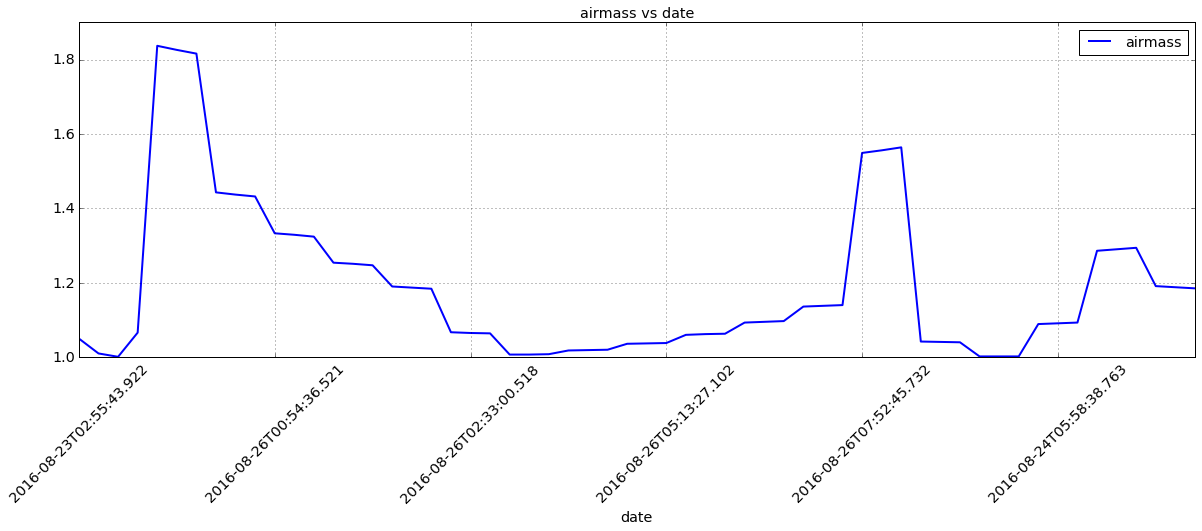

In [51]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)
